In [48]:
import os

import pandas as pd

In [49]:
root = "/Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/logs/"
df_official = pd.read_csv(os.path.join(root, "Cora_GAT_official_results.csv"))
df_our = pd.read_csv(os.path.join(root, "Cora_GAT_our_results_2.csv"))

In [50]:
df_our.head()

,Unnamed: 0,train_loss_list,train_acc_list,val_loss_list,val_acc_list,test_acc_list
0,0,1.981347,13.571429,1.922731,24.6,28.8
1,1,1.954597,15.000000,1.911946,28.6,32.0
2,2,1.937739,18.571429,1.900786,32.2,35.0
3,3,1.902999,17.142857,1.889784,35.4,38.7
4,4,1.893364,27.142857,1.879040,38.4,43.9


In [51]:
df_official.head()
df_official["train_acc"]  = df_official["train_acc"] * 100
df_official["val_acc"]  = df_official["val_acc"] * 100

[None, None, None, None, None, None, None, None]

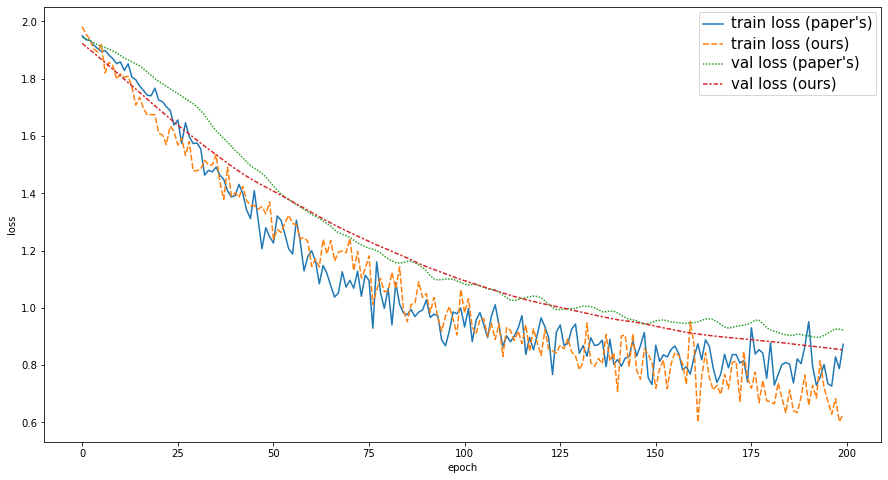

In [52]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss_list"][:num_obs],
                        "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss_list"][:num_obs],})
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_loss)
ax.set(xlabel='epoch', ylabel='loss')

plt.setp(ax.get_legend().get_texts(), fontsize='15')



[None, None, None, None, None, None, None, None]

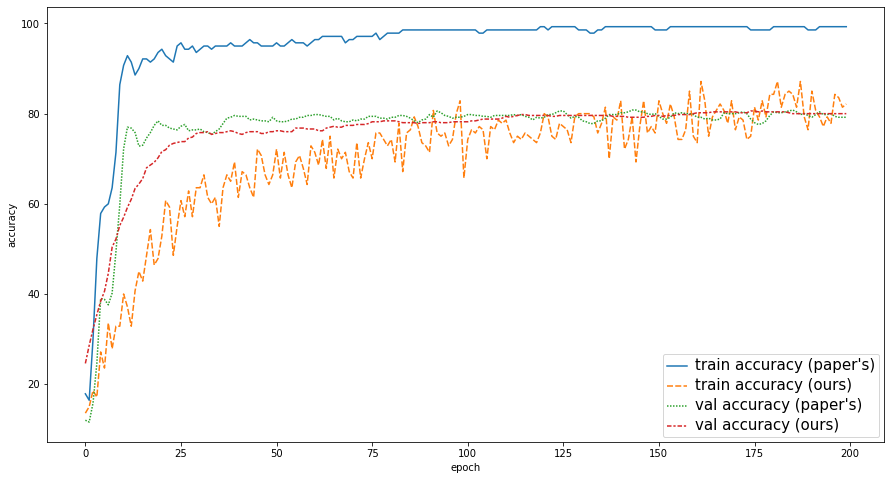

In [53]:
num_obs = len(df_official)
df_acc = pd.DataFrame({"train accuracy (paper's)": df_official["train_acc"],
                        "train accuracy (ours)": df_our["train_acc_list"][:num_obs],
                        "val accuracy (paper's)": df_official["val_acc"],
                        "val accuracy (ours)": df_our["val_acc_list"][:num_obs],})

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_acc)
ax.set(xlabel='epoch', ylabel='accuracy')

plt.setp(ax.get_legend().get_texts(), fontsize='15')